# 线性判别分析

线性判别分析（Linear Discriminant Analysis或者Fisher’s Linear Discriminant）简称LDA，是一种监督学习算法。

LDA的原理是，将数据通过线性变换(投影)的方法，映射到维度更低的空间中，使得投影后的点满足同类型标签的样本在映射后的空间比较近，不同类型标签的样本在映射后的空间比较远。

## 一、线性判别分析(二类情形)


在讲解算法理论之前，先补充一下协方差矩阵的定义。


### 1. 协方差矩阵定义

矩阵$X_{mxn}$协方差的计算公式：

设$x, y$分别是两个列向量，则$x, y$的协方差为
$$cov(x, y) = E(x-\bar{x})(y-\bar{y})$$

若将$x, y$合并成一个矩阵$X_{mxn}$，则求矩阵$X_{mxn}$，则矩阵$X_{mxn}$的协方差矩阵为

$$A = \sum_{i=1...m,j=1...n}a_{ij} = cov(X_i, X_j) = E(X_i-\bar{X_i})(X_j-\bar{X_j})$$


### 2. 模型原理

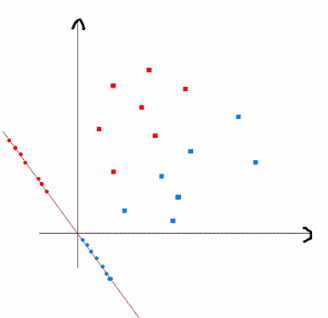

In [32]:
from IPython.display import Image, display

display(Image('lda.jpg'))

上图中红色的正方形形状的点为0类的原样本点、蓝色的正方形形状的点为1类的原样本点，过原点的那条直线就是投影的直线，从图上可以清楚的看到，红色的点和蓝色的点被原点明显的分开了。下面具体看看二分类LDA二类问题的情形：

现在我们觉得原始特征数太多，想将$n$维特征降到只有一维(LDA映射到的低维空间维度小于等于$n_{labels}-1$)，而又要保证类别能够“清晰”地反映在低维数据上，也就是这一维就能决定每个样例的类别。

假设用来区分二分类的直线（投影函数)为:

$$y=w^Tx$$

注意这里得到的$y$值不是0/1值，而是$x$投影到直线上的点到原点的距离。

已知数据集

$$D=\{x^{(1)}, x^{(1)}, …, x^{(m)}\},$$

将$D$按照类别标签划分为两类$D_1, D_2$, 其中$D_1\bigcup D_2=D, D_1\bigcap D_2=\emptyset$, 
定义两个子集的中心：

$$\mu_1 = \frac{1}{n_1} \sum_{x^{(i)} \in D_1} {x^{(i)}},$$
$$\mu_2 = \frac{1}{n_2} \sum_{x^{(i)} \in D_2} {x^{(i)}},$$

则两个子集投影后的中心为
$$\tilde{\mu_1} = \frac{1}{n_1} \sum_{y^{(i)} \in \tilde{D_1}} w^T {x^{(i)}},$$
$$\tilde{\mu_2} = \frac{1}{n_2} \sum_{x^{(i)} \in D_2} w^T {x^{(i)}},$$

则两个子集投影后的方差分别为
$$ \tilde{ \sigma}^2_1 = \frac{1}{n_1} \sum_{y^{(i)} \in \tilde{D_1}} ({y^{(i)}-\tilde{\mu_1}})^2 = 
\frac{1}{n_1} \sum_{x^{(i)} \in {D_1}} ({w^T x^{(i)}-w^T \mu_1})^2 = 
\frac{1}{n_1} \sum_{x^{(i)} \in {D_1}} w^T  ({x^{(i)}- \mu_1})  ({x^{(i)}- \mu_1})^T w  ,$$

同理可得
$$ \tilde{ \sigma}^2_2 = \frac{1}{n_2} \sum_{y^{(i)} \in \tilde{D_2}} ({y^{(i)}-\tilde{\mu_2}})^2 =
\frac{1}{n_2} \sum_{x^{(i)} \in {D_2}} w^T  ({x^{(i)}- \mu_2})  ({x^{(i)}- \mu_2})^T w  , $$

令
$$  S_1 = \frac{1}{n_1}  \sum_{x^{(i)} \in {D_1}} ({x^{(i)}- \mu_1})  ({x^{(i)}- \mu_1})^T, $$

$$  S_2 = \frac{1}{n_2}  \sum_{x^{(i)} \in {D_2}} ({x^{(i)}- \mu_2})  ({x^{(i)}- \mu_2})^T, $$

则有
$$\tilde{ \sigma}^2_1 = w^T S_1 w, \,  \tilde{\sigma}^2_2 = w^T S_2 w.  $$

令
$$  \tilde{S_1} = \frac{1}{n_1} \sum_{y^{(i)} \in \tilde{D_1}} ({y^{(i)}- \tilde{\mu_1}})  ({y^{(i)}- \tilde{\mu_1}})^T, $$

$$  \tilde{S_2} = \frac{1}{n_2}  \sum_{y^{(i)} \in \tilde{D_2}} ({y^{(i)}- \tilde{\mu_2}})  ({y^{(i)}- \tilde{\mu_2}})^T, $$

则有
$$  \tilde{S_1} = w^T S_1 w, \,\,\,  \tilde{S_2} = w^T S_2 w,  $$

现在我们就可以定义损失函数：

$$ J(w) = \frac{|\tilde{\mu}_1 - \tilde{\mu}_2|^2 }{\tilde{S}^2_1 + \tilde{S}^2_2 } $$

我们分类的目标是，使得类别内的点距离越近(集中)，类别间的点越远越好。分母表示数据被映射到低维空间之后每一个类别内的方差之和，方差越大表示在低维空间(映射后的空间)一个类别内的点越分散，欲使类别内的点距离越近(集中)，分母应该越小越好。分子为在映射后的空间两个类别各自的中心点的距离的平方，欲使类别间的点越远，分子越大越好。故我们最大化$J(w)$，求出的w就是最优的了。

因为

$$ |\tilde{\mu}_1 - \tilde{\mu}_2|^2 = w^T (\mu_1 - \mu_2) (\mu_1 - \mu_2)^T w = w^T S_B w,$$

其中，

$$ S_B = (\mu_1 - \mu_2) (\mu_1 - \mu_2)^T .$$

设$S_w = S_1 + S_2,$ 则

$$ J(w) = \frac{w^T S_B w}{w^T S_w w} $$

这样就可以用最喜欢的拉格朗日乘数法了，但是有一个问题，如果分子、分母是都可以取任意值，就会导致有无穷解，我们将分母限制为长度为1（这是用拉格朗日乘子法一个很重要的技巧，在下面将说的PCA里面也会用到，如果忘记了，请复习一下高数），并作为拉格朗日乘子法的限制条件，带入得到：

$$ loss(w) = w^T S_B w - (\lambda w^T S_w w -1) $$

令$$\frac{dloss}{dw}=2 S_B w - 2 \lambda S_w  w = 0, $$ 

则有$$ S_B w = \lambda S_w w. $$ 

很显然，$S_B w$和$\mu_1 - \mu_2$是平行的，又因为对$w$扩大缩小任何倍(平移$w$)不影响结果，因此，只要找到的$w$满足条件$S_B w$与$\mu_1 - \mu_2$平行即可。如果$S_w$是非奇异的，则有

$$w = S_w^{-1}{(\mu_1 - \mu_2)}. $$

下面看看具体的数学推导，
$$ S_B w = (\mu_1 - \mu_2) (\mu_1 - \mu_2)^T w = (\mu_1 - \mu_2) \lambda_w .$$

将上式代入特征值公式中可得$$ S_w^{-1} S_B w = S_w^{-1} (\mu_1 - \mu_2) \lambda_w = \lambda w , $$

因为$w$的平移不影响结果，故可以扔掉$\lambda_w ,  \lambda $，因此可得

$$w = S_w^{-1}{(\mu_1 - \mu_2)}. $$


得到$w$之后，就可以对测试数据进行分类了。

一个常见的LDA分类基本思想是假设各个类别的样本数据符合高斯分布，这样利用LDA进行投影后，可以利用极大似然估计计算各个类别投影数据的均值和方差，进而得到该类别高斯分布的概率密度函数。当一个新的样本到来后，我们可以将它投影，然后将投影后的样本特征分别带入各个类别的高斯分布概率密度函数，计算它属于这个类别的概率，最大的概率对应的类别即为预测类别。


但是这里还有另外一种分类的思想，就以LDA二值分类为例，我们可以将测试数据投影到低维空间(直线，因为二分类问题是投影到一维空间)，得到$y$，然后看看$y$是否在超过某个阈值$y_0$，超过是某一类，否则是另一类。但是又该怎么去寻找这个$y_0$呢？

因为

$$ y = w^T x, $$

根据中心极限定理，独立同分布的随机变量和服从高斯分布，然后利用极大似然估计求

$$ p(y|label_i), $$

然后用决策理论里的公式来寻找最佳的$y_0$，详情请参阅PRML。这是一种可行但比较繁琐的选取方法。

其实，还有另外一种非常巧妙的方法可以确定$y_0=0$，投影之前的数据集的标签$y_{label}$是用0和1来表示，这里我们将其做一个简单的变换，

$$ \begin{cases}
\tilde y_{label}=\frac{m}{n_1} & \text{ if } x\in D_1 \\ 
\tilde y_{label}=-\frac{m}{n_2} & \text{ if } x\in D_2
\end{cases} $$

从变换后的$\tilde y_{label}$的定义可以看出，对于样本$x^{(i)}$， 若$\tilde y_{label}^{(i)}>0$，则$ x^{(i)} \in D_1$，即$ y^{(i)}_{label}=0$，若$\tilde y_{label}^{(i)}<0$，则$ x^{(i)} \in D_2$，即$ y^{(i)}_{label}=1$.




## 算法流程


输入：数据集$D=\{x^{(1)}, x^{(1)}, …, x^{(m)}\}$；

输出：投影后的样本集$D′$；

* 计算类内散度矩阵$S_w$；

* 求解向量$w$，其中$w = S_w^{-1}(\mu_1 - \mu_2)$；

* 将原始样本集投影到以$w$为基向量生成的低维空间中(1维)，投影后的样本集就是我们需要的样本集$D′$(1维特征)。


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd



def shuffle_data(X, y, seed=None):
    if seed:
        np.random.seed(seed)

    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)

    return X[idx], y[idx]



# 正规化数据集 X
def normalize(X, axis=-1, p=2):
    lp_norm = np.atleast_1d(np.linalg.norm(X, p, axis))
    lp_norm[lp_norm == 0] = 1
    return X / np.expand_dims(lp_norm, axis)


# 标准化数据集 X
def standardize(X):
    X_std = np.zeros(X.shape)
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    
    # 做除法运算时请永远记住分母不能等于0的情形
    # X_std = (X - X.mean(axis=0)) / X.std(axis=0) 
    for col in range(np.shape(X)[1]):
        if std[col]:
            X_std[:, col] = (X_std[:, col] - mean[col]) / std[col]
    
    return X_std


# 划分数据集为训练集和测试集
def train_test_split(X, y, test_size=0.2, shuffle=True, seed=None):
    if shuffle:
        X, y = shuffle_data(X, y, seed)
        
    n_train_samples = int(X.shape[0] * (1-test_size))
    x_train, x_test = X[:n_train_samples], X[n_train_samples:]
    y_train, y_test = y[:n_train_samples], y[n_train_samples:]

    return x_train, x_test, y_train, y_test


def accuracy(y, y_pred):
    y = y.reshape(y.shape[0], -1)
    y_pred = y_pred.reshape(y_pred.shape[0], -1)
    return np.sum(y == y_pred)/len(y)


# 计算矩阵X的协方差矩阵
def calculate_covariance_matrix(X, Y=np.empty((0,0))):
    if not Y.any():
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)



class BiClassLDA():
    """
    线性判别分析分类算法(Linear Discriminant Analysis classifier). 既可以用来分类也可以用来降维.
    此处实现二类情形(二类情形分类)
    """
    def __init__(self):
        self.w = None
        
        
    def transform(self, X, y):
        self.fit(X, y)
        # Project data onto vector
        X_transform = X.dot(self.w)
        return X_transform

    
    def fit(self, X, y):
        # Separate data by class
        X = X.reshape(X.shape[0], -1)
        
        X1 = X[y == 0]
        X2 = X[y == 1]
        y = y.reshape(y.shape[0], -1)
        
        # 计算两个子集的协方差矩阵
        S1 = calculate_covariance_matrix(X1)
        S2 = calculate_covariance_matrix(X2)
        Sw = S1 + S2
        
        # 计算两个子集的均值
        mu1 = X1.mean(axis=0)
        mu2 = X2.mean(axis=0)
        mean_diff = np.atleast_1d(mu1 - mu2)
        mean_diff = mean_diff.reshape(X.shape[1], -1)
        
        # 计算w. 其中w = Sw^(-1)(mu1 - mu2), 这里我求解的是Sw的伪逆, 因为Sw可能是奇异的
        self.w = np.linalg.pinv(Sw).dot(mean_diff)
        

    def predict(self, X):
        y_pred = []
        for sample in X:
            sample = sample.reshape(1, sample.shape[0])
            h = sample.dot(self.w)
            y = 1 * (h[0][0] < 0)
            y_pred.append(y)
        return y_pred


def main():
    # 加载数据
    data = datasets.load_iris()
    X = data.data
    y = data.target

    # 只取label=0和1的数据，因为是二分类问题
    X = X[y != 2]
    y = y[y != 2]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
    # 训练模型
    lda = BiClassLDA()
    lda.fit(X_train, y_train)
    lda.transform(X_train, y_train)
    
    # 在测试集上预测
    y_pred = lda.predict(X_test)
    y_pred = np.array(y_pred)
    accu = accuracy(y_test, y_pred)
    print ("Accuracy:", accu)
    

if __name__ == "__main__":
    main()


Accuracy: 1.0
